This is an introduction to the fastbt framework. 

Fastbt is built upon the assumption that you enter and hold all your positions for a specific time period and exit at the end of the period or when stop loss is triggered. For more information, see the philosophy and the rationale pages.

I would take a top-down approach where I would run a strategy with the default parameters and then adjust the parameters one by one. You could always inspect the results by exporting them to a Excel file.


In [15]:
# Import the necessary libraries
import pandas as pd
from fastbt.rapid import backtest, metrics

# Option to display all the columns
pd.options.display.max_columns = 50 

# Load the data from a csv file
# We would work with this data throughout this notebook
df = pd.read_csv('data/data.csv', parse_dates=['timestamp'])

> **fastbt** requires only a dataframe to throw some results. You could get started with just one line of code

In [16]:
result = backtest(data=df)

So, what did it do? Let's see the results and the metrics

In [17]:
print(metrics(result))
result.head()

{'profit': 0.0, 'commission': 0.0, 'slippage': 0.0, 'net_profit': 0.0, 'high': 0.0, 'low': 0.0, 'returns': 0.0}


,symbol,series,open,high,low,close,last,prevclose,qty,volume,timestamp,totaltrades,isin_code,prevdayret,prevhigh,prevlow,price,stop_loss,buy,sell,cnt,profit,commission,slippage,net_profit
106,NTPC,EQ,179.5,180.30,176.75,177.05,177.00,178.90,111.0,1.841344e+09,2018-01-03,46065,INE733E01010,0.013311,179.25,176.55,179.5,179.5,179.5,179.5,5,0.0,0.0,0.0,0.0
109,ONGC,EQ,197.4,197.40,193.00,193.45,193.65,196.85,101.0,1.562229e+09,2018-01-03,58365,INE213A01029,0.023395,197.50,195.00,197.4,197.4,197.4,197.4,5,0.0,0.0,0.0,0.0
105,POWERGRID,EQ,201.5,202.45,200.60,201.65,202.10,200.75,99.0,9.281992e+08,2018-01-03,68699,INE752E01010,0.002747,201.80,199.30,201.5,201.5,201.5,201.5,5,0.0,0.0,0.0,0.0
108,ITC,EQ,261.3,262.65,260.60,261.15,260.95,260.75,77.0,2.884993e+09,2018-01-03,67791,INE154A01025,-0.005909,264.20,260.45,261.3,261.3,261.3,261.3,5,0.0,0.0,0.0,0.0
128,COALINDIA,EQ,271.0,273.45,269.70,271.85,272.60,270.05,74.0,2.509182e+09,2018-01-03,46281,INE522F01014,0.012751,270.90,267.00,271.0,271.0,271.0,271.0,5,0.0,0.0,0.0,0.0


You run a backtest with the default parameters.

By default, the strategy buys the top 5 securities with the lowest price at the open price and sells them at the same price with a capital of 100000. This looks dumb but lets look at the result dataframe. In addition to the columns in the original dataframe, it has added a few more columns. The important ones to look out for are

 * price - price at which the position is to be entered
 * stop_loss - price at which stop loss would be triggered
 * buy - the actual buy price
 * sell - the actual sell price
 * qty - the quantity of securities bought
 
fastbt always returns a dataframe with these columns. qty is calculated by dividing the total capital by the number of securities (all securities are equally weighted for this purpose) and by the price. Since we have specified no stop loss securities are bought and sold at the same price.  

Now, let's try adding a stop loss and see the results. Stop loss is the percentage to be kept as stop loss from the price. Just specify it as an integer and it would be converted into percentage. So if you need a 0.5 percentage stop loss, use `stop_loss=0.5`

### A note on the backtest function

> **backtest** is a function with multiple arguments. You could look at the all the arguments and their default values by typing `backtest?` in your console.

> Its recommended to call the backtest function with keyword arguments instead of positional arguments.

```python
backtest(data=df, capital=100000, leverage=1)
```

In [18]:
result = backtest(data=df, stop_loss=3)
print(metrics(result))
result.head()

{'profit': -11510.5000000004, 'commission': 0.0, 'slippage': 0.0, 'net_profit': -11510.5000000004, 'high': 136.34999999998809, 'low': -13656.200000000395, 'returns': -0.115105000000004}


,symbol,series,open,high,low,close,last,prevclose,qty,volume,timestamp,totaltrades,isin_code,prevdayret,prevhigh,prevlow,price,stop_loss,buy,sell,cnt,profit,commission,slippage,net_profit
106,NTPC,EQ,179.5,180.30,176.75,177.05,177.00,178.90,111.0,1.841344e+09,2018-01-03,46065,INE733E01010,0.013311,179.25,176.55,179.5,174.10,179.5,177.05,5,-271.95,0.0,0.0,-271.95
109,ONGC,EQ,197.4,197.40,193.00,193.45,193.65,196.85,101.0,1.562229e+09,2018-01-03,58365,INE213A01029,0.023395,197.50,195.00,197.4,191.50,197.4,193.45,5,-398.95,0.0,0.0,-398.95
105,POWERGRID,EQ,201.5,202.45,200.60,201.65,202.10,200.75,99.0,9.281992e+08,2018-01-03,68699,INE752E01010,0.002747,201.80,199.30,201.5,195.45,201.5,201.65,5,14.85,0.0,0.0,14.85
108,ITC,EQ,261.3,262.65,260.60,261.15,260.95,260.75,77.0,2.884993e+09,2018-01-03,67791,INE154A01025,-0.005909,264.20,260.45,261.3,253.45,261.3,261.15,5,-11.55,0.0,0.0,-11.55
128,COALINDIA,EQ,271.0,273.45,269.70,271.85,272.60,270.05,74.0,2.509182e+09,2018-01-03,46281,INE522F01014,0.012751,270.90,267.00,271.0,262.85,271.0,271.85,5,62.90,0.0,0.0,62.90


Yeps! your strategy has resulted in a massive loss. Let's try to make a sense of how price is determined.

Taking the first case **NTPC**, you expect to buy it at a price of 177.05 and exit the position with a stop loss of 3%, 171.75. Since the buy price is equal to open price, the buy order is considered executed. Since the stop loss of 171.75 is not hit during the period, you exit the position at the close price. See the rationale page for a more detailed explanation of how prices are determined.

You know this is a BUY order since the stop loss is less than the price. It is a SELL order if the stop loss is greater than the price. So let's go short instead of long.

In [19]:
result = backtest(data=df, stop_loss=3, order='S')
metrics(result)

{'profit': 5412.20000000039,
 'commission': 0.0,
 'slippage': 0.0,
 'net_profit': 5412.20000000039,
 'high': 8010.850000000393,
 'low': -237.39999999970962,
 'returns': 0.0541220000000039}

**Hurray! you made a profit**


Now, let's take a look at the result dataframe

In [20]:
result.head()

,symbol,series,open,high,low,close,last,prevclose,qty,volume,timestamp,totaltrades,isin_code,prevdayret,prevhigh,prevlow,price,stop_loss,sell,buy,cnt,profit,commission,slippage,net_profit
106,NTPC,EQ,179.5,180.30,176.75,177.05,177.00,178.90,111.0,1.841344e+09,2018-01-03,46065,INE733E01010,0.013311,179.25,176.55,179.5,184.90,179.5,177.05,5,271.95,0.0,0.0,271.95
109,ONGC,EQ,197.4,197.40,193.00,193.45,193.65,196.85,101.0,1.562229e+09,2018-01-03,58365,INE213A01029,0.023395,197.50,195.00,197.4,203.30,197.4,193.45,5,398.95,0.0,0.0,398.95
105,POWERGRID,EQ,201.5,202.45,200.60,201.65,202.10,200.75,99.0,9.281992e+08,2018-01-03,68699,INE752E01010,0.002747,201.80,199.30,201.5,207.55,201.5,201.65,5,-14.85,0.0,0.0,-14.85
108,ITC,EQ,261.3,262.65,260.60,261.15,260.95,260.75,77.0,2.884993e+09,2018-01-03,67791,INE154A01025,-0.005909,264.20,260.45,261.3,269.15,261.3,261.15,5,11.55,0.0,0.0,11.55
128,COALINDIA,EQ,271.0,273.45,269.70,271.85,272.60,270.05,74.0,2.509182e+09,2018-01-03,46281,INE522F01014,0.012751,270.90,267.00,271.0,279.15,271.0,271.85,5,-62.90,0.0,0.0,-62.90


## A simple digression
Notice that the results are asymmetric. The long results didn't replicate exactly as the short results. We made a loss of 12116 with the long strategy but we only made a profit of 5516 with the short strategy. So the strategies aren't exact mirror of each other. This is due to the fact that we introduced stop loss. Let's try without stop loss; you would due to this by making stop loss a big number.

In [21]:
result_one = metrics(backtest(data=df, stop_loss=200, order='B'))
result_two = metrics(backtest(data=df, stop_loss=200, order='S'))

result_one['profit'], result_two['profit']

(-8449.35000000045, 8449.35000000045)

Now, let's change price. Price is simply a formula string based on existing columns in your original dataframe. You can use any column along with common mathematical and logical operators (all numexpr expressions are valid). **Your formula should just be a single expression and should not contain any functions**. The following are all valid formulas

* open + 0.05
* prevhigh * 1.01
* (prevhigh+prevlow)/2

In [22]:
result = backtest(data=df, stop_loss=3, 
                  price='(open+prevclose)/2', order='S')
print(metrics(result))
result.head()

{'profit': 8562.400000000564, 'commission': 0.0, 'slippage': 0.0, 'net_profit': 8562.400000000564, 'high': 11305.50000000057, 'low': 171.35000000000986, 'returns': 0.08562400000000564}


,symbol,series,open,high,low,close,last,prevclose,qty,volume,timestamp,totaltrades,isin_code,prevdayret,prevhigh,prevlow,price,stop_loss,sell,buy,cnt,profit,commission,slippage,net_profit
106,NTPC,EQ,179.5,180.30,176.75,177.05,177.00,178.90,112.0,1.841344e+09,2018-01-03,46065,INE733E01010,0.013311,179.25,176.55,179.2,184.60,179.2,177.05,5,240.80,0.0,0.0,240.80
109,ONGC,EQ,197.4,197.40,193.00,193.45,193.65,196.85,101.0,1.562229e+09,2018-01-03,58365,INE213A01029,0.023395,197.50,195.00,197.1,203.00,197.1,193.45,5,368.65,0.0,0.0,368.65
105,POWERGRID,EQ,201.5,202.45,200.60,201.65,202.10,200.75,99.0,9.281992e+08,2018-01-03,68699,INE752E01010,0.002747,201.80,199.30,201.1,207.15,201.1,201.65,5,-54.45,0.0,0.0,-54.45
108,ITC,EQ,261.3,262.65,260.60,261.15,260.95,260.75,77.0,2.884993e+09,2018-01-03,67791,INE154A01025,-0.005909,264.20,260.45,261.0,268.85,261.0,261.15,5,-11.55,0.0,0.0,-11.55
128,COALINDIA,EQ,271.0,273.45,269.70,271.85,272.60,270.05,74.0,2.509182e+09,2018-01-03,46281,INE522F01014,0.012751,270.90,267.00,270.5,278.60,270.5,271.85,5,-99.90,0.0,0.0,-99.90


Now try adding a few conditions to filter down the results. Conditions are similar to the price string with the only difference being they must evaluate to a boolean expression. Also, conditions should be specified as a list of conditions even if there is a single conditions. Conditions are always AND to each other. So securities would be picked only if all the conditions are fulfilled.

The following conditions are valid
 * open > 100
 * open > prevclose
 * open < prevhigh
 
Conditions are always AND to each other. So securities would be picked only if all the conditions are fulfilled. 

Henceforth, I would use a dictionary for all the arguments

In [23]:
params = {
    'data': df,
    'stop_loss': 3,
    'price': '(open+prevclose)/2',
    'order': 'S',
    'conditions': [
        'open > 220'
    ]    
}
result = backtest(**params)
print(metrics(result))
result.head()

{'profit': 1612.4500000004018, 'commission': 0.0, 'slippage': 0.0, 'net_profit': 1612.4500000004018, 'high': 8063.4500000001635, 'low': -1674.249999999639, 'returns': 0.016124500000004018}


,symbol,series,open,high,low,close,last,prevclose,qty,volume,timestamp,totaltrades,isin_code,prevdayret,prevhigh,prevlow,price,stop_loss,sell,buy,cnt,profit,commission,slippage,net_profit
108,ITC,EQ,261.3,262.65,260.60,261.15,260.95,260.75,77.0,2.884993e+09,2018-01-03,67791,INE154A01025,-0.005909,264.2,260.45,261.00,268.85,261.00,261.15,5,-11.55,0.0,0.0,-11.55
128,COALINDIA,EQ,271.0,273.45,269.70,271.85,272.60,270.05,74.0,2.509182e+09,2018-01-03,46281,INE522F01014,0.012751,270.9,267.00,270.50,278.60,270.50,271.85,5,-99.90,0.0,0.0,-99.90
125,HINDALCO,EQ,273.4,279.35,273.10,276.50,276.50,271.90,73.0,2.015672e+09,2018-01-03,63837,INE038A01020,0.002766,274.4,268.10,272.65,280.85,276.50,276.50,5,0.00,0.0,0.0,0.00
104,SBIN,EQ,305.3,306.45,302.15,302.85,302.80,303.25,66.0,4.217070e+09,2018-01-03,117207,INE062A01020,-0.012537,309.0,301.35,304.25,313.40,304.25,302.85,5,92.40,0.0,0.0,92.40
142,ICICIBANK,EQ,312.5,316.35,312.50,315.00,314.90,309.70,64.0,2.801398e+09,2018-01-03,89066,INE090A01021,-0.001934,311.7,307.50,311.10,320.45,315.00,315.00,5,0.00,0.0,0.0,0.00


By default, 5 symbols are returned for each day and they are sorted by the price column in ascending order. Use the limit, sort_mode and sort_by arguments to change them. To sort in descending order, pass sort_mode equals False

In [24]:
params = {
    'data': df,
    'stop_loss': 3,
    'price': '(open+prevclose)/2',
    'order': 'S',
    'limit': 3,
    'sort_mode': False,
    'sort_by': 'prevdayret'
   
}
result = backtest(**params)
print(metrics(result))
result.head()

{'profit': 18920.650000000518, 'commission': 0.0, 'slippage': 0.0, 'net_profit': 18920.650000000518, 'high': 22748.150000000398, 'low': -3553.3999999999382, 'returns': 0.1892065000000052}


,symbol,series,open,high,low,close,last,prevclose,qty,volume,timestamp,totaltrades,isin_code,prevdayret,prevhigh,prevlow,price,stop_loss,sell,buy,cnt,profit,commission,slippage,net_profit
121,TATAMOTORS,EQ,440.40,441.40,431.95,433.90,433.45,439.30,76.0,4.261435e+09,2018-01-03,89076,INE155A01022,0.034986,440.85,422.00,439.85,453.05,439.85,433.90,3,452.2,0.0,0.0,452.2
141,INFRATEL,EQ,379.70,383.45,376.45,378.65,379.00,378.80,88.0,7.627418e+08,2018-01-03,51526,INE121J01017,0.023922,380.00,370.10,379.25,390.65,379.25,378.65,3,52.8,0.0,0.0,52.8
124,UPL,EQ,776.95,787.75,774.00,775.80,776.90,773.45,43.0,1.495378e+09,2018-01-03,46221,INE628A01036,0.023420,776.00,748.50,775.20,798.45,775.20,775.80,3,-25.8,0.0,0.0,-25.8
170,ADANIPORTS,EQ,408.70,410.70,406.05,409.85,410.00,407.65,82.0,8.144965e+08,2018-01-04,26844,INE742F01042,0.025793,410.90,397.45,408.15,420.40,408.15,409.85,3,-139.4,0.0,0.0,-139.4
191,LT,EQ,1284.95,1320.00,1280.10,1315.70,1313.30,1275.30,26.0,5.930258e+09,2018-01-04,118456,INE018A01030,0.020444,1283.95,1251.50,1280.10,1318.50,1280.10,1318.50,3,-998.4,0.0,0.0,-998.4


Impressive, we have started barebones and developed a profitable strategy in a few steps. Let's add commission and slippage to see what would be our net profit. You must pass commission and slippage as a percentage of price. 

Note
> Commission is applied to both BUY and SELL while slippage is applied only on one side since one of the orders is considered a LIMIT order. To apply slippage for both BUY and SELL, double the slippage percentage.

In [25]:
params = {
    'data': df,
    'stop_loss': 3,
    'price': '(open+prevclose)/2',
    'order': 'S',
    'limit': 3,
    'sort_mode': False,
    'sort_by': 'prevdayret',
    'commission': 0.02,
    'slippage': 0.03
}
result = backtest(**params)
print(metrics(result))


{'profit': 18920.650000000518, 'commission': 4869.81035, 'slippage': 7304.7155250000005, 'net_profit': 6746.124125000523, 'high': 15211.778050000237, 'low': -5127.101149999935, 'returns': 0.06746124125000523}


The above is identical to
```python
result = backtest(data=df, stop_loss=3, price='(open+prevclose)/2',
                   order='S', commission=0.02, slippage=0.03,
                   limit=3, sort_mode=False, sort_by='prevdayret')
```

Yeps! Most of our profits are wiped away. So let's see a couple of charts

Populating the interactive namespace from numpy and matplotlib


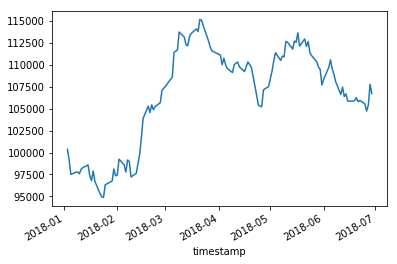

In [26]:
%pylab inline
(result.groupby('timestamp').net_profit.sum().cumsum()+100000).plot()

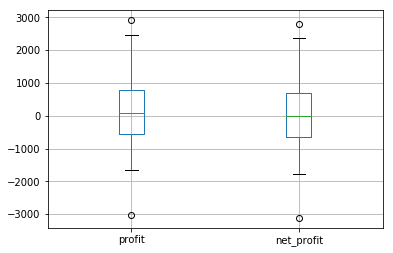

In [27]:
result.groupby('timestamp').sum()[['profit', 'net_profit']].boxplot()

The graphics are minimal. I recommend the excellent pyfolio package for visualizing your returns. pyfolio accepts only returns as its input along with timestamp. So to convert our dataframe, just groupby timestamp, sum the daily profits and divide by your capital.

```python
result.groupby('timestamp').net_profit.sum()/capital
```

Now, let's try a simple simulation by varying the stoploss with the above structure and plot the results.

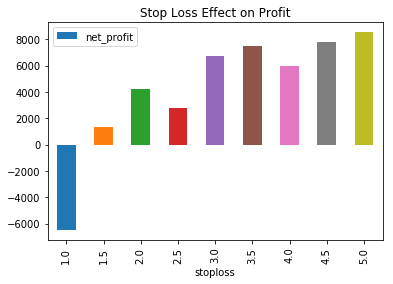

In [28]:
params = {
    'data': df,
    'stop_loss': 3,
    'price': '(open+prevclose)/2',
    'order': 'S',
    'limit': 3,
    'sort_mode': False,
    'sort_by': 'prevdayret',
    'commission': 0.02,
    'slippage': 0.03
}
stoploss = [1,1.5,2,2.5,3,3.5,4,4.5,5]
result_array = []
for s in stoploss:
    params.update({'stop_loss': s})
    r = backtest(**params)
    m = metrics(r)
    m['stoploss'] = s
    result_array.append(m)
    
pd.DataFrame(result_array).plot.bar(x='stoploss', y='net_profit',
                                   title='Stop Loss Effect on Profit')

## Notes
I have left out a three important arguments; universe, columns and strategy.

Universe is the stock universe to get symbols from if you are connecting to a SQL database. Pass a list of symbols, a sql alchemy connection string and the table name to fetch data from a database. You could also use the start and end dates to limit your queries. If you specify both data and the above arguments, data takes precedence and the rest are ignored.

Columns are columns you could add to your dataframe in an expressive text format instead of adding them as code. The format is identical to the `batch_process` function of the `DataSource` object. 

You could pass a custom strategy altogether to suit your needs. In such a case, the data returned is upto the point of adding columns and applying conditions and these results are grouped by the timestamp column. You could then apply your strategy to this dataframe.

For running bigger simulations, use the multi_args function from utils. Make sure you save your results by including them in your code in case of long running simulations.

The backtest function is just a wrapper to other 5 functions that run behind the scenes.